# Proyecto 3

 [Presentación](https://acortar.link/Nro7os)

1) Importación de librerías necesarias:

In [2]:
import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

2) Extraer datos desde la API Binance:

In [ ]:
#Convertir la fecha actual a timestamp
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365*10)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=3d&limit=1000&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
x = ast.literal_eval(APIresp.text)
df = pd.DataFrame(x)

# Grabar el resultado como CSV separado por comas
CSVfilename = "binance.csv"
df.to_csv(CSVfilename, index=False)

3) Abrir el dataset

In [66]:
df = pd.read_csv('binance.csv')
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48,4485.39,3850.00,4139.98,2376.348404,1503187199999,1.009121e+07,10813,1863.453293,7.925342e+06,0
1,1503187200000,4120.98,4211.08,3400.00,4040.00,2125.510940,1503446399999,8.480102e+06,12787,1358.147235,5.450252e+06,0
2,1503446400000,4040.00,4453.91,4013.89,4280.68,2362.168058,1503705599999,9.929800e+06,21430,616.337478,2.596523e+06,0
3,1503705600000,4280.71,4400.00,4124.54,4386.69,1182.642269,1503964799999,5.091106e+06,10279,300.629281,1.296170e+06,0
4,1503964800000,4353.65,4745.42,4313.55,4724.89,1968.970601,1504223999999,8.946077e+06,13871,471.452144,2.150945e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
661,1674259200000,22666.00,23371.80,22292.37,22916.45,893611.616560,1674518399999,2.041868e+10,21659002,444360.797300,1.015425e+10,0
662,1674518400000,22917.81,23816.73,22300.00,23009.65,928126.050580,1674777599999,2.126162e+10,22637116,460072.828120,1.054029e+10,0
663,1674777600000,23009.65,23960.54,22534.88,23742.30,724638.366040,1675036799999,1.681262e+10,18291749,363068.618140,8.424708e+09,0
664,1675036800000,23743.37,23812.66,22500.00,23732.66,877845.673010,1675295999999,2.031713e+10,22451848,438232.242610,1.014359e+10,0


In [67]:
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df = df.rename(columns={'4':'price', '6':'date'})
df.columns


Index(['price', 'date'], dtype='object')

In [68]:
df.dtypes

price    float64
date       int64
dtype: object

4) Convetir fecha

In [69]:
from datetime import datetime
listaDate = []
for date in df['date']:
    listaDate.append(datetime.fromtimestamp(date//1000))
df.index = listaDate
df.sample(2)

,price,date
2018-07-19 01:59:59,7381.90,1531958399999
2019-03-16 00:59:59,3923.76,1552694399999


5) Convertir antes al formato datetime para que lo reconozca como índice timestamp

In [70]:
df = df.drop(df.columns[[1]], axis='columns')
df.sample(3)

,price
2020-10-27 00:59:59,13052.19
2020-12-05 00:59:59,18650.52
2019-06-17 01:59:59,8953.33


In [85]:
df.index.name="Date"
df.sample(3)

,price,MA_90,logPrice
Date,,,
2019-06-29 01:59:59,12400.63,5404.565667,3.732761
2021-10-22 01:59:59,62193.15,46451.728556,4.667002
2018-04-11 01:59:59,6843.90,NaN,NaN


6) Graficamos

<function matplotlib.pyplot.show(close=None, block=None)>

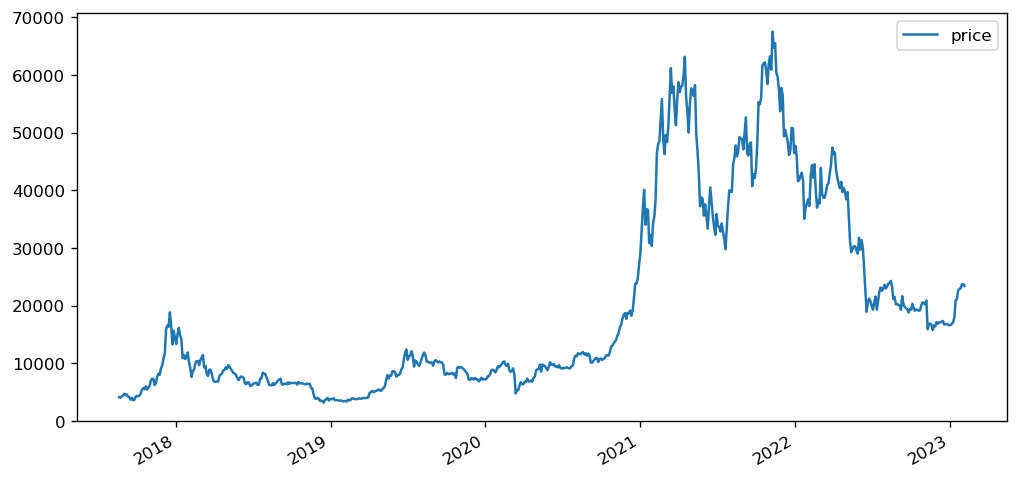

In [71]:
df.plot(kind='line', y='price')
plt.show

7) Seleccionar modelo

In [73]:
from statsmodels.tsa.arima_model import ARIMA

# Crear el modelo ARIMA
model = ARIMA(df['price'], order=(2, 1, 2)) #hiperparámetros
model_fit = model.fit()

# Realizar la predicción
predictions = model_fit.forecast(steps=30)[0]

# Imprimir las predicciones
print(predictions)

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

[23449.47550067 23559.32569924 23583.05264057 23681.14684201
 23703.81418165 23791.91026551 23813.93949413 23893.52549596
 23915.23656027 23987.57307283 24009.20535807 24075.36113636
 24097.09041565 24157.97229296 24179.92438818 24236.30242754
 24258.56419206 24311.0928452  24333.72096859 24382.95688783
 24405.98493194 24452.40197437 24475.84597558 24519.84785077
 24543.71076201 24585.64170079 24609.91689652 24650.07065691
 24674.74468322 24713.37215817]


c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


8) Calcular el Moving Average

In [74]:
#Con una ventana de 90 días (trimestre)
df['MA_90'] = df['price'].rolling(window=90).mean()


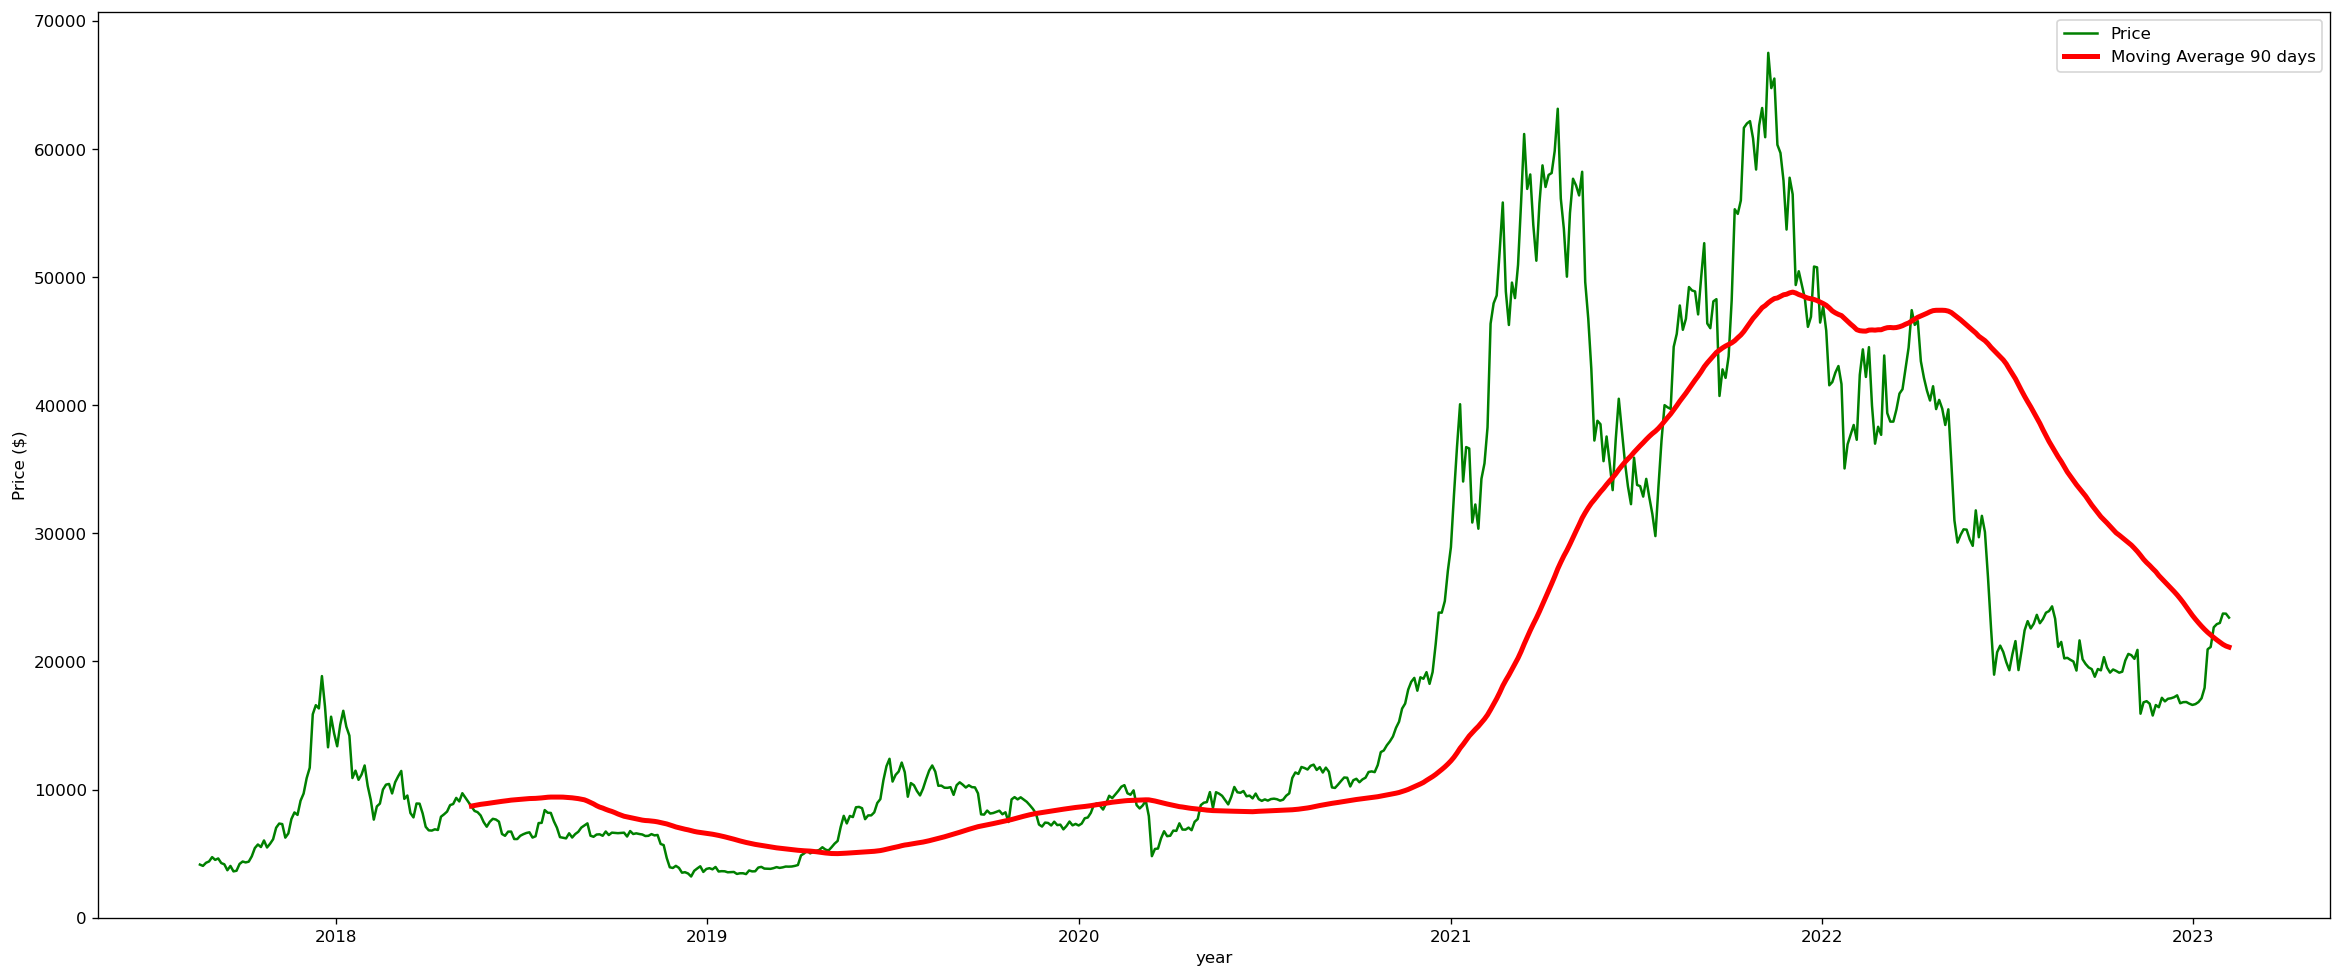

In [75]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Draw it
plt.figure(figsize=(24,10))
plt.plot(df['price'], label = 'Price', color = 'green')
plt.plot(df['MA_90'], label = 'Moving Average 90 days', color = 'red', linewidth=3)
plt.xlabel('year')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

9) Calcular y graficar la escala Logarítmica

In [76]:
df["logPrice"] = df["MA_90"].apply(lambda x: math.log10(x))
df

,price,MA_90,logPrice
2017-08-20 01:59:59,4139.98,NaN,NaN
2017-08-23 01:59:59,4040.00,NaN,NaN
2017-08-26 01:59:59,4280.68,NaN,NaN
2017-08-29 01:59:59,4386.69,NaN,NaN
2017-09-01 01:59:59,4724.89,NaN,NaN
...,...,...,...
2023-01-24 00:59:59,22916.45,21685.956222,4.336179
2023-01-27 00:59:59,23009.65,21514.192889,4.332725
2023-01-30 00:59:59,23742.30,21336.996222,4.329133
2023-02-02 00:59:59,23732.66,21206.554778,4.326470


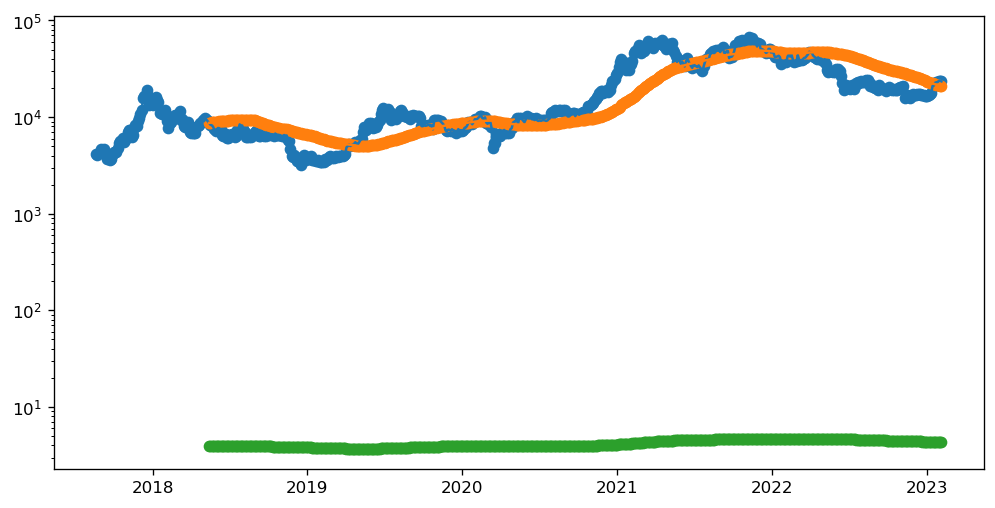

In [79]:
fig, ax = plt.subplots()
ax.scatter(df.index, df.price)
ax.scatter(df.index, df.MA_90)
ax.scatter(df.index, df.logPrice)
ax.set_yscale("log")
ax.plot(df)
plt.show()

In [80]:
# dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]

In [81]:
# entrenar el modelo ARIMA
model = ARIMA(train['price'], order=(1, 0, 1))
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

10) Entrenamiento del modelo

In [82]:
# hacer predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))[0]

In [83]:
# calcular el error de las predicciones
error = np.mean(np.abs(predictions - test['price'].values)) / np.mean(test['price'].values)
print('Error:', error)

Error: 0.4274443936335987


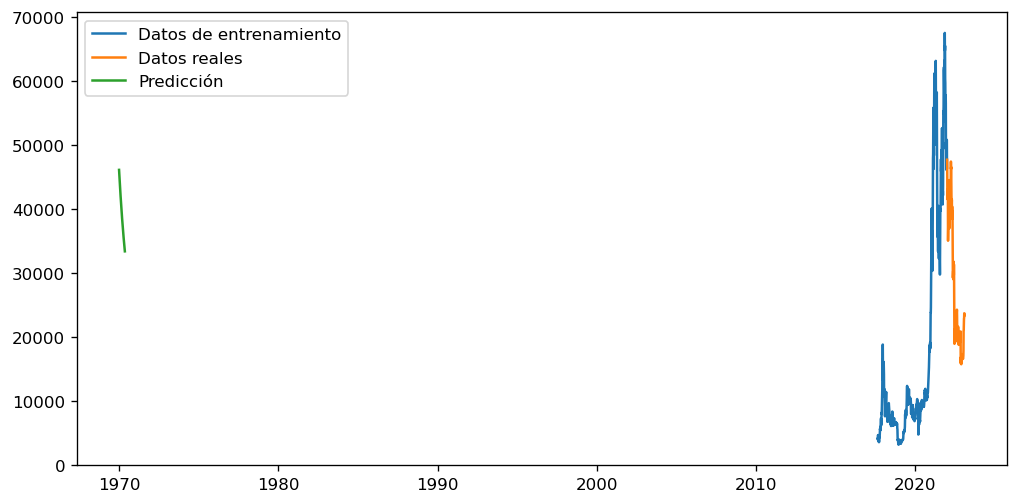

In [84]:
# visualizar los resultados
plt.plot(train['price'], label='Datos de entrenamiento')
plt.plot(test['price'], label='Datos reales')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()

In [88]:
from statsmodels.tsa.stattools import adfuller
# realice la prueba de raíz unitaria de Dickey-Fuller
result = adfuller(df['price'])
print('ADF Statistic: %f' % result[1])
print('p-value: %f' % result[2])

#resultado prueba 1:
#ADF Statistic: -1.602410
#p-value: 0.482383

#resultado prueba 2 :
#ADF Statistic: 0.482383
#p-value: 3.000000


ADF Statistic: 0.482383
p-value: 3.000000


In [90]:
df.head()

,price,MA_90,logPrice
Date,,,
2017-08-20 01:59:59,4139.98,NaN,NaN
2017-08-23 01:59:59,4040.00,NaN,NaN
2017-08-26 01:59:59,4280.68,NaN,NaN
2017-08-29 01:59:59,4386.69,NaN,NaN
2017-09-01 01:59:59,4724.89,NaN,NaN
